<a href="https://colab.research.google.com/github/ReneSRuiz/Mineria_de_datos/blob/main/Visualizaci%C3%B3n_Equipo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equipo:** 11  
**Grupo:** 001  
**Frecuencia:** lunes  
**Integrantes:**

 *   García Alanís Alejandro Uriel 1886968
 *   Estrada Dávila Jorge Eduardo 1741943
 *   Paz Reyes Néstor Misael 1559508
 *   González García Elisa 1858207
 *   Sobrevilla Ruiz Rene 1941452  

**BASE DE DATOS 1**  
En nombre oficial de la base de datos es "Lichess September 2020 data", la cual se puede encontrar por el siguiente enlace: https://www.kaggle.com/noobiedatascientist/lichess-september-2020-data?select=Sept_20_analysis.csv  
Iniciaremos importando las librerías necesarias:


In [2]:
#importando las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Una vez importadas las librerías necesarias, cargamos la base de datos. 

In [2]:
#Importar la base de datos al google colab
from google.colab import files
files.upload()

Saving Sept_20_analysis.csv to Sept_20_analysis.csv


**ANÁLISIS DESCRIPTIVO**  
Ya tenemos los datos de los juegos, por lo que veremos un análisis descriptivo de estos. Analizaremos las veces que un juego "cambia de lado", es decir, cuando un jugador, que tenía las de perder, ahora tiene las de ganar, ya sea por errores del rival o por astucia del mismo jugador.

In [3]:
#Nuestros datos a trabajar son
df = pd.read_csv("Sept_20_analysis.csv")
df.head(5)

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0-1,https://lichess.org/hjb8FYm1,Time forfeit,300+0,00:00:00,1180,-7.0,Low rating,Low rating,300.0,0.0,Blitz,66,4,2,0,3,3,1,7,6,8,8,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,Réti Opening,0-1,https://lichess.org/Iz2fbHuE,Normal,300+0,00:00:00,1381,NaN,Low rating,Low rating,300.0,0.0,Blitz,64,2,1,1,1,7,5,10,7,0,0,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0-1,https://lichess.org/Cdj7flmY,Time forfeit,300+2,00:00:00,1485,-1.0,High rating,Low rating,300.0,2.0,Blitz,70,0,1,1,2,8,8,9,11,0,2,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0-1,https://lichess.org/WZQ9FEpD,Normal,180+2,00:00:00,2040,-11.0,Low rating,High rating,180.0,2.0,Blitz,86,4,2,1,5,3,4,8,11,18,0,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,1-0,https://lichess.org/ESlJl57U,Normal,600+0,00:00:00,2163,0.0,Low rating,High rating,600.0,0.0,Rapid,71,1,0,1,1,6,2,8,3,0,0,0,0,0,0,0,0,0,0,2,0


In [4]:
print("Cantidad de juegos:", df['Game_flips'].count(), "\n")
print("Suma de veces que el juego ha cambiado de lado:", df['Game_flips'].sum(), "\n")
print("Promedio de veces que el juego ha cambiado de lado:", df['Game_flips'].mean(), "\n")
print("Varianza de los datos:", df['Game_flips'].var(), "\n")
print("Desviación estándar de los datos:", df['Game_flips'].std(), "\n")
print("Mínimo de veces que el juego ha cambiado de lado:", df['Game_flips'].min(), "\n")
print("Máximo de veces que el juego ha cambiado de lado:", df['Game_flips'].max(), "\n")
print("Simetría de los datos:", df['Game_flips'].skew(), "\n")
print("Curtosis", df['Game_flips'].kurt())

Cantidad de juegos: 3739909 

Suma de veces que el juego ha cambiado de lado: 23381577 

Promedio de veces que el juego ha cambiado de lado: 6.251910674831928 

Varianza de los datos: 22.465073515142542 

Desviación estándar de los datos: 4.739733485665892 

Mínimo de veces que el juego ha cambiado de lado: 0 

Máximo de veces que el juego ha cambiado de lado: 83 

Simetría de los datos: 1.2683948770567326 

Curtosis 2.270590063811904


Primeramente observamos que se analizaron más de 3 millones de juegos, de los cuales, hubo un total de 23,381,577 veces donde el juego se ha cambiado de lado, es decir, cuando el jugador que iba perdiendo, toma la delantera. Además, se promedia que esto pasaba unas 6 veces por partida, con una varianza de 22.46 y desviación estandar de 4.73. Vemos igualmente que ha habido juegos donde siempre hubo un jugador dominante, es decir, nunca perdió la ventaja, mientras que los juegos más "emocionantes" tuviueron hasta 83 cambios de ventajas. Vemos que la simetría es pósitiva, por lo que los datos son asimétricos positivos (datos cargados a la izquierda). Y la curtosis es pequeña, por lo que los datos no distan mucho de la media. No se realizará la suma acumulada por la gran cantidad de los datos, además de no tener relevancia en este apartado. Veamos ahora que menciona la función "describe":

In [5]:
df['Game_flips'].describe()

count    3.739909e+06
mean     6.251911e+00
std      4.739733e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      9.000000e+00
max      8.300000e+01
Name: Game_flips, dtype: float64

Vemos que igualmente tenemos las mismas concluciones anteriores, pero incluye los cuartiles, donde el 25% de los datos tienen desde 3 "volteos de juego" para abajo, el 50% de los datos llegan hasta 5 "volteos de juego" y 75% de los datos llegan hasta 9 "volteos de juego". Nótese que entre el 75% de los datos y el máximo hay una gran diferencia (83 - 9 = 74 volteos), por lo que los juegos más "interesantes" solo ocurren entre el 3er cuartil y el máximo. Por temas práctivos, veremos ahora la correlación y covarianzas que tienen estos "volteos de juegos" con la cantidad de movimientos realizados y con los errores tanto de las negras como blancas.

In [6]:
df[['Game_flips','Total_moves','Black_mistakes','White_mistakes','Black_blunders','White_blunders','Black_inaccuracies','White_inaccuracies']].corr()

,Game_flips,Total_moves,Black_mistakes,White_mistakes,Black_blunders,White_blunders,Black_inaccuracies,White_inaccuracies
Game_flips,1.000000,0.370956,0.571525,0.581290,0.531400,0.542827,0.338618,0.344977
Total_moves,0.370956,1.000000,0.391956,0.405046,0.275205,0.288797,0.410985,0.418509
Black_mistakes,0.571525,0.391956,1.000000,0.611297,0.289684,0.299283,0.207608,0.247187
White_mistakes,0.581290,0.405046,0.611297,1.000000,0.286873,0.293314,0.257674,0.229119
Black_blunders,0.531400,0.275205,0.289684,0.286873,1.000000,0.735081,0.102847,0.033984
White_blunders,0.542827,0.288797,0.299283,0.293314,0.735081,1.000000,0.038638,0.112724
Black_inaccuracies,0.338618,0.410985,0.207608,0.257674,0.102847,0.038638,1.000000,0.472544
White_inaccuracies,0.344977,0.418509,0.247187,0.229119,0.033984,0.112724,0.472544,1.000000


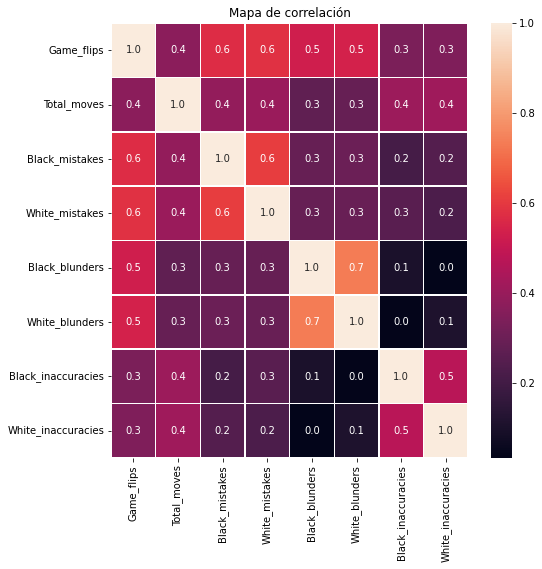

In [7]:
f,ax=plt.subplots(figsize = (8,8))
sns.heatmap(df[['Game_flips','Total_moves','Black_mistakes','White_mistakes','Black_blunders','White_blunders','Black_inaccuracies','White_inaccuracies']].corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

A grandes rasgos, las inexactitudes tanto de blancas como negras no tienen mucha relación con los demás tipos de errores, solo consigo mismas, mientras que las "meteduras de patas" de ambos jugadores tiene fuerte relación con los "volteos de juego" y con las mismas "meteduras de patas", lo cual es esperado. Igualmente los errores de ambos jugadores se relacionan con los "volteos de juego", además que se puede notar que se relacionan los errores blancos con los negros, haciendo notar que al menos, si uno se equivoca, el otro tiende a equivocarse igualmente. Veamos las covarianzas:

In [8]:
df[['Game_flips','Total_moves','Black_mistakes','White_mistakes','Black_blunders','White_blunders','Black_inaccuracies','White_inaccuracies']].cov()

,Game_flips,Total_moves,Black_mistakes,White_mistakes,Black_blunders,White_blunders,Black_inaccuracies,White_inaccuracies
Game_flips,22.465074,46.981310,6.322939,6.466969,4.940140,5.080447,3.266121,3.334561
Total_moves,46.981310,713.999544,24.446484,25.404301,14.423474,15.238019,22.348251,22.805945
Black_mistakes,6.322939,24.446484,5.448291,3.349163,1.326230,1.379425,0.986149,1.176655
White_mistakes,6.466969,25.404301,3.349163,5.509440,1.320709,1.359481,1.230816,1.096755
Black_blunders,4.940140,14.423474,1.326230,1.320709,3.847050,2.846987,0.410510,0.135936
White_blunders,5.080447,15.238019,1.379425,1.359481,2.846987,3.899174,0.155265,0.453938
Black_inaccuracies,3.266121,22.348251,0.986149,1.230816,0.410510,0.155265,4.141308,1.961126
White_inaccuracies,3.334561,22.805945,1.176655,1.096755,0.135936,0.453938,1.961126,4.158994


Vemos que no hay covarianzas negativas, por lo que cualquier acción, ya sea errores del rival, los movimientos o los "volteos de juego", tienen relaciones directas, es decir, relaciones proporcionales unas con las otras, unas con mayor medida que otras. Habiendo ya analizado de forma descriptiva, ahora tratemos de hacer tantas gráficas como podamos.  

**GRÁFICAS:**

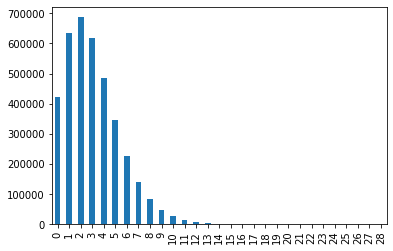

In [10]:
df['Black_mistakes'].value_counts().sort_index().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


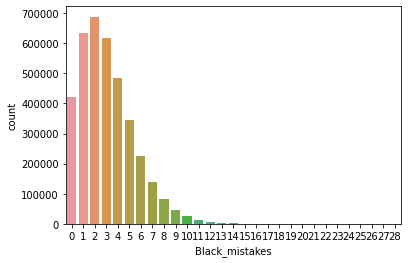

In [11]:
sns.countplot(df['Black_mistakes'])

Con esta gráfica de barras, vemos que el jugador que juega "Negras", tiende a cometer pocos errores, mayormente 2 (Moda). A pesar de que se ve un máximo de 28 errores, alcanzar tal magnitud es realmente muy atípico.

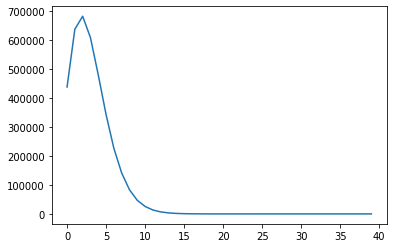

In [12]:
df['White_mistakes'].value_counts().sort_index().plot.line()

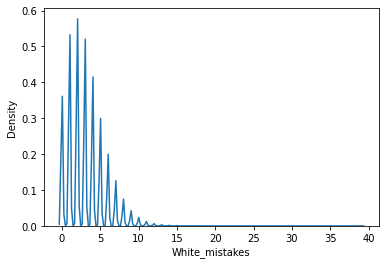

In [13]:
sns.kdeplot(df['White_mistakes'])

De la misma forma que con las "Negras", con esta gráfica de lineas podemos observar que el jugador de las "Blancas" comete pocos errores, con su pico mas alto entre 0 y 5 errores por juego. Además, al igual que con el jugador de las negras, pasando los 10-15 errores, sería muy atípico que siga cometiendo más de estos.

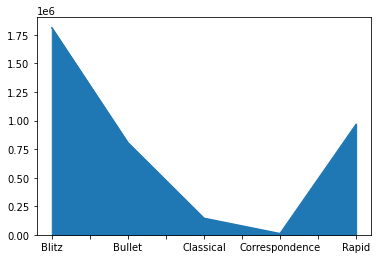

In [14]:
df['Game_type'].value_counts().sort_index().plot.area()

Con esta gráfica vemos que la modalidad favorita de los jugadores es jugar "BLITZ" y su variante, "RAPID", mientras que el menos favorito son por "CORRESPONDENCE" (Correspondencia) y de forma "CLASSICAL" (Clásica). Muy probabemente por los tiempos, ya que los Blitz son mas rápidos, mientras que los de correspondencia llevan bastantes horas.

64.02237808460045


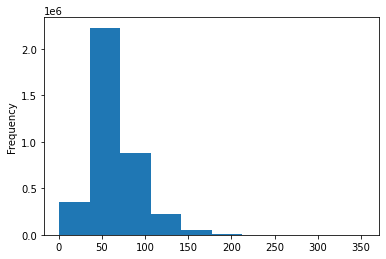

In [15]:
df['Total_moves'].plot.hist()
print(df['Total_moves'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


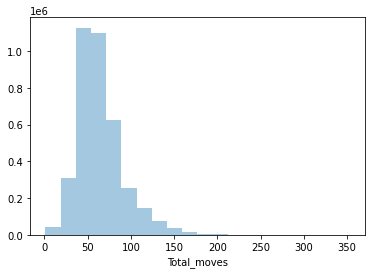

In [16]:
sns.distplot(df['Total_moves'], bins=20, kde=False)

Con este histograma, vemos que la mayoría de los juegos están entre 50 y 100 movimientos, pocos juegos acaban en menos de 50 movimientos y, los juegos mayores a 100 movimientos son muy escasos, sobre todo los que juegan más de 200 movimientos, podrian ser casos muy atípicos. 

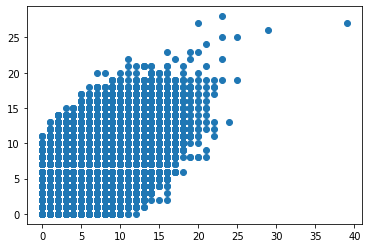

In [17]:
plt.scatter(df['White_mistakes'],df['Black_mistakes'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


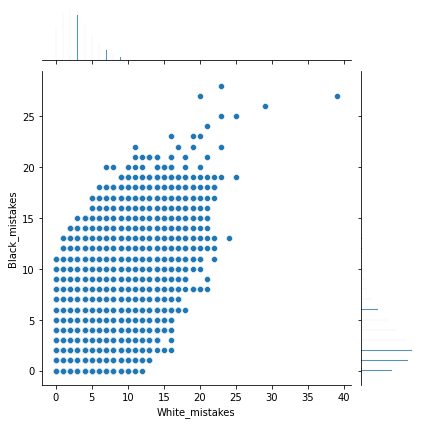

In [18]:
sns.jointplot(df['White_mistakes'],df['Black_mistakes'])

Con esta gráfica, comparamos los errores cometidos tanto por jugadores de "Negras" como de "Blancas" y se puede notar un pequeño patrón lineal, lo que podría indicar que los errores de uno afectan al otro o que los errores del otro afectan a uno.

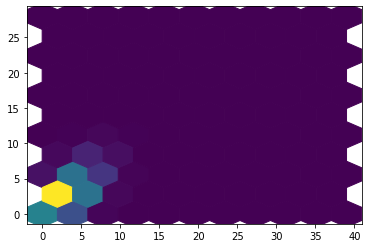

In [19]:
plt.hexbin(df['White_mistakes'],df['Black_mistakes'],gridsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


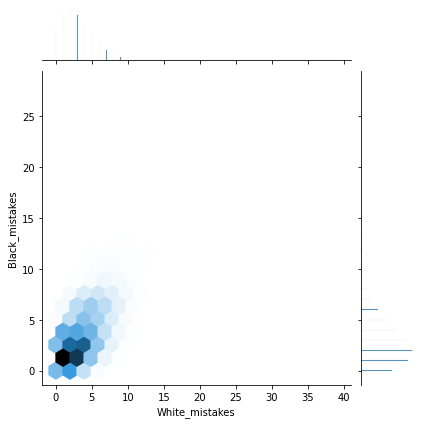

In [20]:
sns.jointplot(df['White_mistakes'],df['Black_mistakes'],kind='hex', gridsize=20)

Igualmente, como vimos en las gráficas de lineas y barras, los errores tanto del jugador de "Negras" como de "Blancas" se concentran, en su mayoría, entre los intervalos de 0 a 10, por lo que ver mas de 10 errores podrian ser casos excepcionales.  
Para seguir con otras gráficas, se creó un DataFrame de Apoyo con los errores y meteduras de para tanto del jugador de "Blancas" como el de "Negras. Además, acotamos que sean desde 0 a 5 por cuestiones de practicidad.

In [21]:
#Crear un nuevo df para los datos
Columnas = ('Errores_Negro','Errores_Blanco','Meteduras_Patas_Negro','Meteduras_Patas_Blanco')
L0 = (df[df['Black_mistakes']==0]['Black_mistakes'].count(),df[df['White_mistakes']==0]['White_mistakes'].count(),
      df[df['Black_blunders']==0]['Black_blunders'].count(),df[df['White_blunders']==0]['White_blunders'].count())
L1 = (df[df['Black_mistakes']==1]['Black_mistakes'].count(),df[df['White_mistakes']==1]['White_mistakes'].count(),
      df[df['Black_blunders']==1]['Black_blunders'].count(),df[df['White_blunders']==1]['White_blunders'].count())
L2 = (df[df['Black_mistakes']==2]['Black_mistakes'].count(),df[df['White_mistakes']==2]['White_mistakes'].count(),
      df[df['Black_blunders']==2]['Black_blunders'].count(),df[df['White_blunders']==2]['White_blunders'].count())
L3 = (df[df['Black_mistakes']==3]['Black_mistakes'].count(),df[df['White_mistakes']==3]['White_mistakes'].count(),
      df[df['Black_blunders']==3]['Black_blunders'].count(),df[df['White_blunders']==3]['White_blunders'].count())
L4 = (df[df['Black_mistakes']==4]['Black_mistakes'].count(),df[df['White_mistakes']==4]['White_mistakes'].count(),
      df[df['Black_blunders']==4]['Black_blunders'].count(),df[df['White_blunders']==4]['White_blunders'].count())
L5 = (df[df['Black_mistakes']==5]['Black_mistakes'].count(),df[df['White_mistakes']==5]['White_mistakes'].count(),
      df[df['Black_blunders']==5]['Black_blunders'].count(),df[df['White_blunders']==5]['White_blunders'].count())
Lista = [L0, L1, L2, L3, L4, L5]
APOYO = pd.DataFrame(Lista, columns=Columnas)

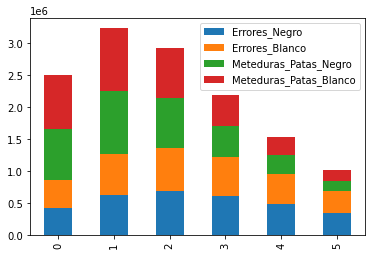

In [22]:
APOYO.plot.bar(stacked=True)

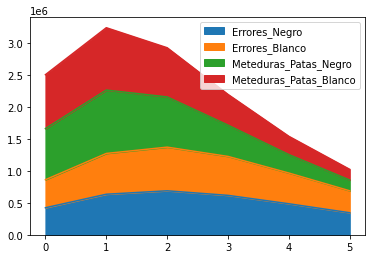

In [23]:
APOYO.plot.area()

En esta primera y segunda gráfico, podemos concluir lo siguiente. Hay menos errores y meteduras de pata mientras más se registran, por lo que se puede suponer que encontrar partidas con muchos errores y meteduras de patas es poco común. Además, al inicio hay más meteduras de pata que errores, pero conforme mas se cometen, tienden a ser errorres y no meteduras de pata.

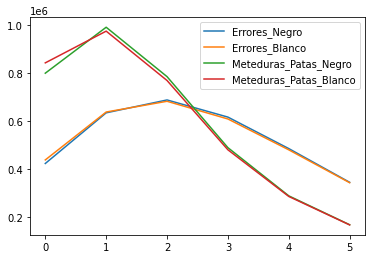

In [24]:
APOYO.plot.line()

Esta gráfica nos da deja ver que, tanto las meteduras de pata como los errores de los jugadores, puede que sigan un mismo patrón, es decir, el jugador de "Blancas" puede tender a cometer los mismos errores que el jugador de "Negras", y lo mismo pasa con las meteduras de pata, ya que las lineas siguen un mismo patrón, lo que puede ser muy interesante de estudiar.

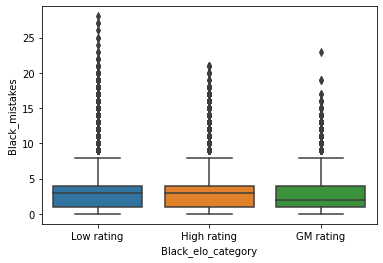

In [25]:
sns.boxplot(x='Black_elo_category', y='Black_mistakes', data=df)

En estos boxplot, podemos destacar los outliers, ya que en cualquier división, estos se encuentran. Pero sorprende que, en "Low rating", parece ser que hya más juegos donde el de "Negras" comete más errores de los esperados, por lo que podría ser un factor de su estanco en esa división.

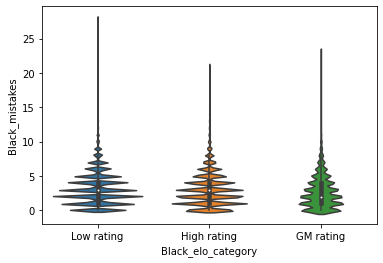

In [26]:
sns.violinplot(x='Black_elo_category', y='Black_mistakes', data=df)

Igual que con la gráfica de Boxplot, La mayoría de los errores los cometen los jugadores de "Low rating", y los de "GM rating", a pesar de tener un violín un poco más alargado, tienen menos concentraciones de errores, lo cual es esperado.

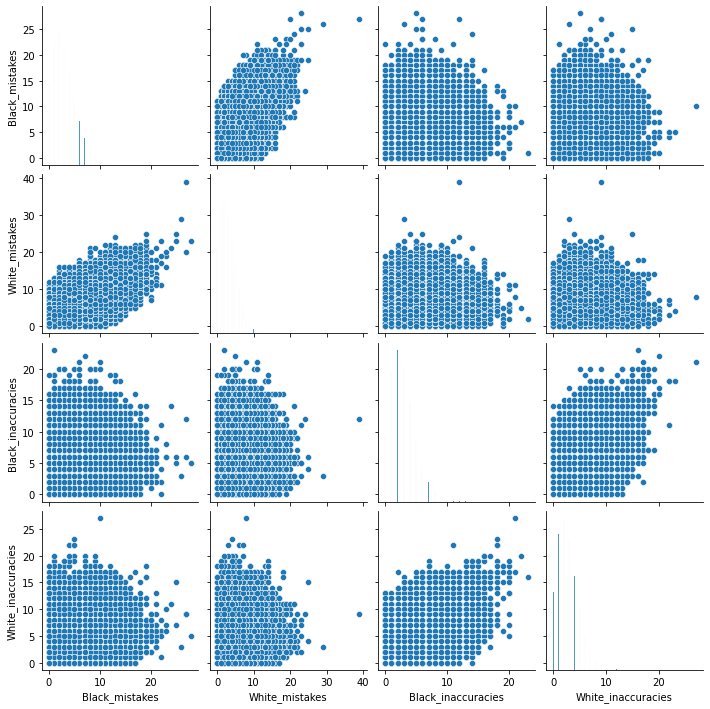

In [27]:
sns.pairplot(df[['Black_mistakes','White_mistakes','Black_inaccuracies','White_inaccuracies']])

Con este conjunto de gráficas, vemos las relaciones entre los errores e inesactitudes del jugador de "Negras" como de "Blancas" y vemos que, los únicos que pueden aparentar un patrón, son las inexactitudes del de "Negras" con el de "Blancas", al igual que los errores. Por lo que puede que tengan relación unos con otros en esos ámbitos.

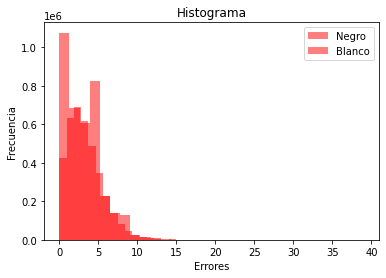

In [28]:
m = plt.hist(df['Black_mistakes'],bins=30,fc = (1,0,0,0.5),label = "Negro")
b = plt.hist(df['White_mistakes'],bins=30,fc = (1,0,0,0.5),label = "Blanco")
plt.legend()
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

Y en esta última gráfica, comparamos los errores cometidos por el jugador de "Negras" contra los cometidos por el de "Blancas". Vemos que es muy poco común que ambos hagan muchos errores, por ejemplo mas de 10, pero lo interesante es al inicio. En el intervalo de 0 a 5, el blanco tiende a cometer más errores que el negro, por lo que en teoría, el negro puede tener ventaja. Se tendría que analizar los demás tipos de errores (inesactitudes y meteduras de pata) y ver si tienen un mismo comportamiento, y como esto afecta al resultado final.

**BASE DE DATOS 2**  
En nombre oficial de la base de datos es "Students Performance in Exams", la cual se puede encontrar por el siguiente enlace: https://www.kaggle.com/spscientist/students-performance-in-exams 

Ahora cargaremos la base de datos:



In [29]:
#Importar la base de datos al google colab
from google.colab import files
files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


{'StudentsPerformance.csv': b'"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"\n"female","group B","bachelor\'s degree","standard","none","72","72","74"\n"female","group C","some college","standard","completed","69","90","88"\n"female","group B","master\'s degree","standard","none","90","95","93"\n"male","group A","associate\'s degree","free/reduced","none","47","57","44"\n"male","group C","some college","standard","none","76","78","75"\n"female","group B","associate\'s degree","standard","none","71","83","78"\n"female","group B","some college","standard","completed","88","95","92"\n"male","group B","some college","free/reduced","none","40","43","39"\n"male","group D","high school","free/reduced","completed","64","64","67"\n"female","group B","high school","free/reduced","none","38","60","50"\n"male","group C","associate\'s degree","standard","none","58","54","52"\n"male","group D","associate\'s degre

**ANÁLISIS DESCRIPTIVO**


Ya tenemos los datos de los estudiantes, por lo que veremos un análisis descriptivo de estos. Analizaremos el examen de matemáticas de los estudiantes.   



In [30]:
#Nuestros datos a trabajar son
df3 = pd.read_csv("StudentsPerformance.csv")
df3.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
print("Cantidad de examenes evaluados: ", df3['math score'].count(), "\n")
print("Suma de las calificaciones:", df3['math score'].sum(), "\n")
print("Promedio de calificaciones:", df3['math score'].mean(), "\n")
print("Varianza de los datos:", df3['math score'].var(), "\n")
print("Desviación estándar de los datos:", df3['math score'].std(), "\n")
print("Calificación mínima:", df3['math score'].min(), "\n")
print("Calificación máxima:", df3['math score'].max(), "\n")
print("Simetría de los datos:", df3['math score'].skew(), "\n")
print("Curtosis", df3['math score'].kurt())

Cantidad de examenes evaluados:  1000 

Suma de las calificaciones: 66089 

Promedio de calificaciones: 66.089 

Varianza de los datos: 229.91899799799847 

Desviación estándar de los datos: 15.163080096009468 

Calificación mínima: 0 

Calificación máxima: 100 

Simetría de los datos: -0.27893514909431694 

Curtosis 0.27496405752108455



Podemos observar que el total de calificaciones de matemáticas analizadas son 1000,sumadas nos dan 66089 y el promedio total es de 66 aproximadamente, esto nos hace ver que la mayoría de los estudiantes obtuvieron una calificación reprobatoria considerando que para que una calificación sea aprobatoria, debe ser mayor o igual a 70. Por otra parte, tenemos una varianza de 229.9189 y una desviación estándar de 15.163, con esto podemos decir que existe una dispersión considerable en los datos, por lo que hay calificaciones desde la más baja(0) hasta la más alta(100). El índice de simetría de los datos es negativo y es por eso que los datos se cargan más hacia la derecha, sin embargo, el número es pequeño por lo que los datos no están bruscamente cargados y es la razón por la que se ve que mucha gente reprueba,esto reforzado por la curtosis, la cual es pequeña, indicando que muchos de los estudiantes no distan de la media.

In [32]:
df3['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

Lo anterior nos confirma que muchos estudiantes reprueban matemáticas. Además el 75% de los estudiantes obtienen una calificacón baja y solo un 25% aprueba el examen aproximadmente.

Ahora nos interesa analizar la correlación y covarianza entre los 3 examenes.

In [33]:
df3[['math score','reading score','writing score']].corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


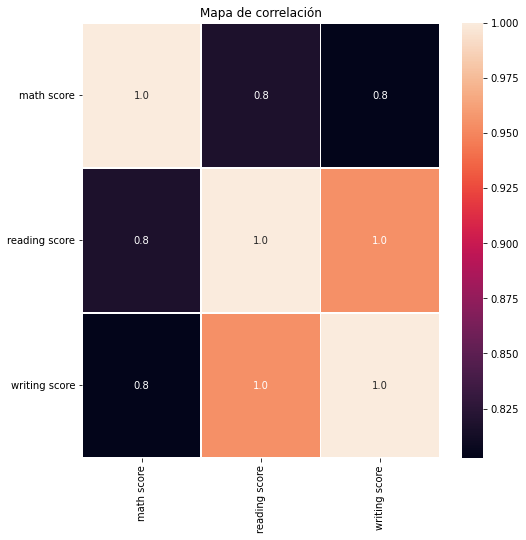

In [34]:
f,ax=plt.subplots(figsize = (8,8))
sns.heatmap(df3[['math score','reading score','writing score']].corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

In [35]:
df3[['math score','reading score','writing score']].cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


Podemos ver que los datos estan fuertemente relacionados, lo cual nos indica que las calficiaciones que obtuvieron en una materia se relacionan con la demas, por lo que si se mejora en una materia, se podría mejorar en las demas. Lo anterior reforzado con la covarianza, ya que estas son positivas indicando que tienen una relación directa.

**GRÁFICAS**

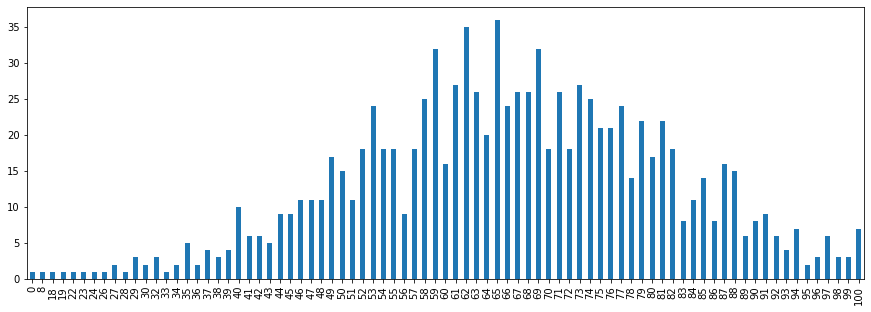

In [36]:
f,ax=plt.subplots(figsize = (15,5))
df3['math score'].value_counts().sort_index().plot.bar()

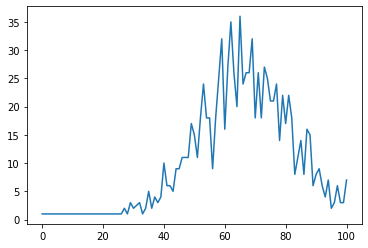

In [37]:
df3['math score'].value_counts().sort_index().plot.line()

Podemos ver que la gráfica es muy parecida a una distribución normal y como concluimos anteriormente también se puede ver la gráfica un poco hacia la derecha, sin embargo esto no significa que las calificaciones sean aprobatorias en su mayoría. Además, el promedio coincide con el punto más alto de la gráfica, aumentando la sospecha de que provienen de una normal.

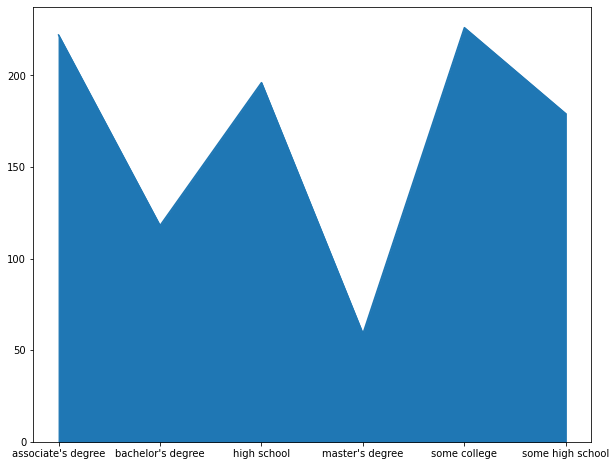

In [38]:
f,ax=plt.subplots(figsize = (10,8))
df3['parental level of education'].value_counts().sort_index().plot.area()

Podemos observar que la mayoría de los padres no cuentan con una carrera universitaria formal, es decir que muchos desertaron de los estudios o estudiaron de manera informal, ya sea por cursos o estudios técnicos. Por otra parte,  la cantidad de padres que cuentan con una maestría es mínima.

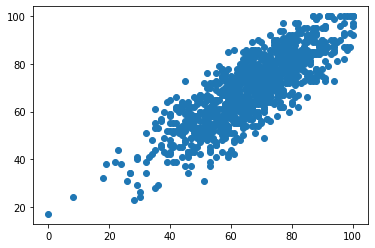

In [39]:
plt.scatter(df3['math score'],df3['reading score'])

La gráfica de puntos nos indica que las calificaciones de matemáticas y de lectura aparantemente se relacionan de manera lineal. Esto es una consecuencia de la correlación alta que tienen.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


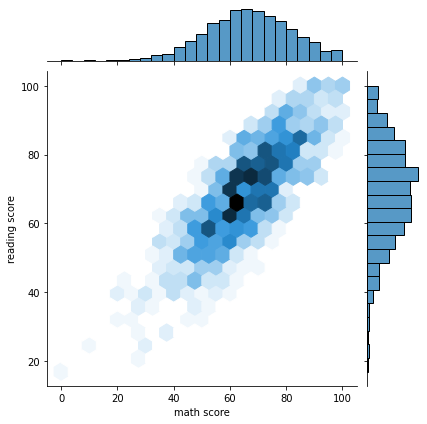

In [40]:
sns.jointplot(df3['math score'],df3['reading score'],kind='hex', gridsize=20)

La mayoría de los datos se concentran en el intervalo de 60-80, y el resto se disipa a lo largo del resto de calificaciones.

In [41]:
#Crear un nuevo df para los datos
Columnas = ('Mujeres','Hombres')
L0 = (df3[df3['test preparation course']=='none'][df3['gender']=='female']['test preparation course'].count(),
      df3[df3['test preparation course']=='none'][df3['gender']=='male']['test preparation course'].count())
L1 = (df3[df3['test preparation course']=='completed'][df3['gender']=='female']['test preparation course'].count(),
      df3[df3['test preparation course']=='completed'][df3['gender']=='male']['test preparation course'].count())
Lista = [L0, L1]
APOYO = pd.DataFrame(Lista, columns=Columnas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


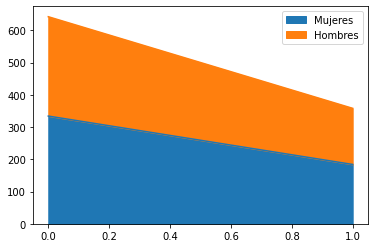

In [42]:
APOYO.plot.area()

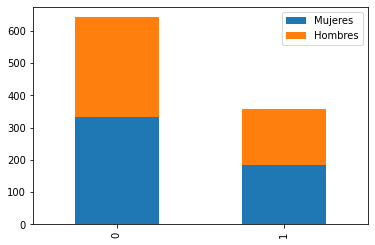

In [43]:
APOYO.plot.bar(stacked=True)


Antes de realizar las gráficas, se creó un nuevo DataFrame para la visualización de los mismos. Tomando en cuenta de que el 0 significa que no se realizó el exámen de preparación y el 1 que si lo tomaron. Podemos concluir que la mayoría de los estudiantes no se preparon lo suficiente, ademas de que en ambos casos se presenta un 50% de hombres y mujeres, o al menos eso aparenta.




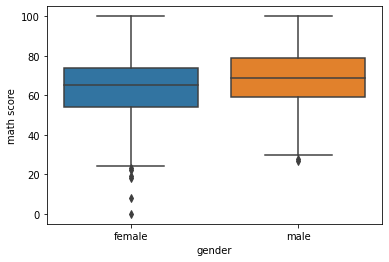

In [44]:

sns.boxplot(x='gender', y='math score', data=df3)


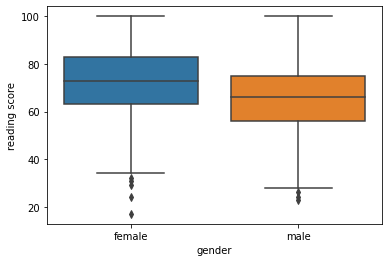

In [45]:
sns.boxplot(x='gender', y='reading score', data=df3)


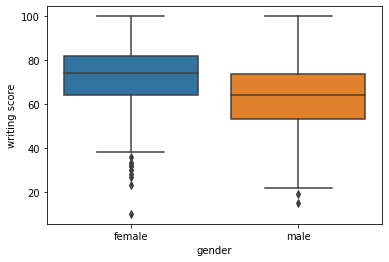

In [46]:

sns.boxplot(x='gender', y='writing score', data=df3)

Analizando y comparando las calificaciones de hombres y mujeres con respecto a los 3 examenes. Podemos observar que los hombres tienden a tener mejor calificación en matemáticas, mientras que a las mujeres son mejores en lectura y escritura.
No ocuparemos la gráfica de violín debido a que obtendriamos las mismas conclusiones.

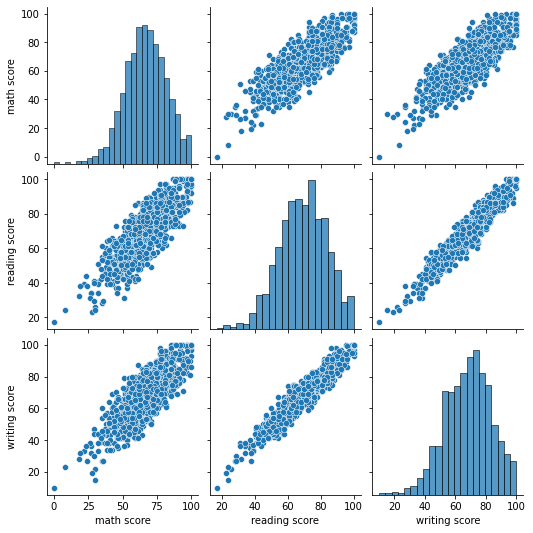

In [47]:
sns.pairplot(df3[['math score','reading score','writing score']])

Como vimos en la correlación y covarianza, la calificación de los 3 examenes estan realcionadas entre si de forma directa, y aparentemente de manera lineal, como se observa en la matriz de gráficas.